# Exploratory Data Analysis in Python

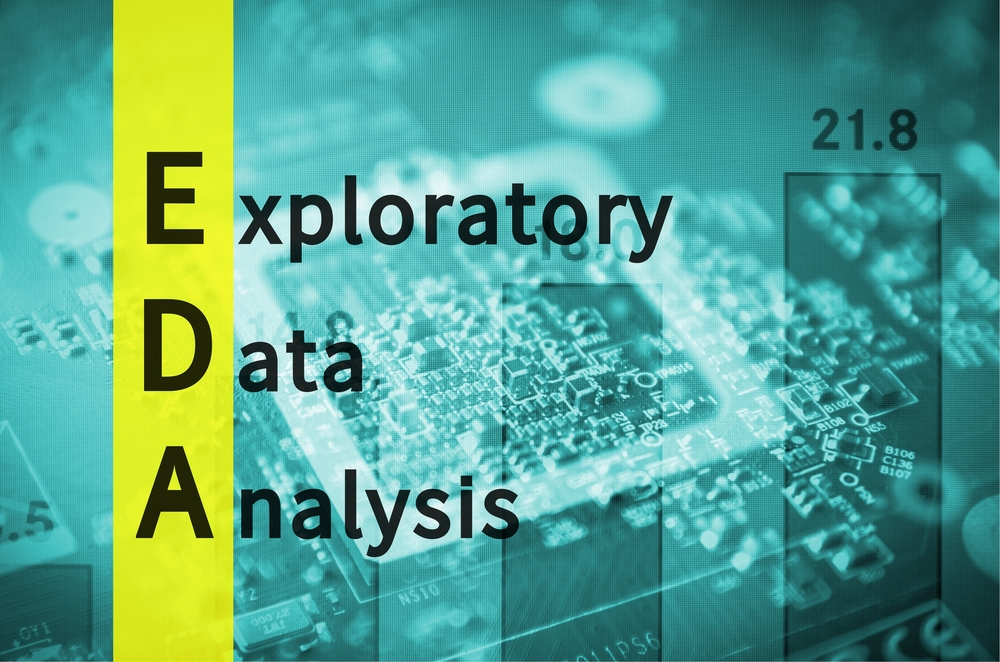

### Lets import the required libraries to perform EDA 

In [2]:
# Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

### Lets load the data into the data frame.
Click [here](https://ylblz-my.sharepoint.com/:x:/g/personal/ahmodrufai_ylblz_onmicrosoft_com/ETuUyBQEDwVFkvhgJMcQiesBMv4BcJIiqLqy7CynguEROQ?e=t6y9Q3) to download the dataset.
The data is an excel file (.xlsx) so we will load the dataset into the pandas dataframe through the data file path.
Steps to laod the data
1. Locate the file in your download folder
2. Select the file, Click on Home, Click on Copy path
3. Paste the file path with "r" before the path

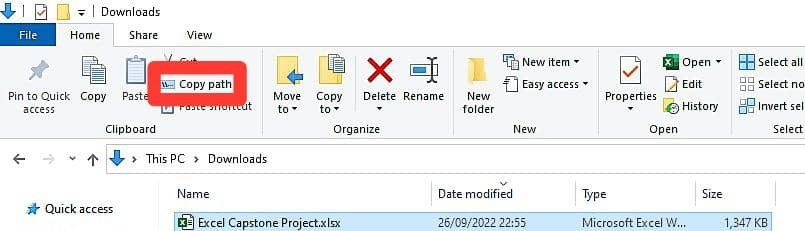

In [3]:
df = pd.read_excel(r"C:\Users\xxxxxx xxxxx xxxx\xxxxx - xxxx\xxxx xxx xxxxx\Excel Capstone Project.xlsx")
# View the dataset 
df.head() 

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


By default, pandas read the first worksheet in our excel workbook file. Lets see the components of other worksheet

In [4]:
# View all worksheets
xl = pd.ExcelFile(r"C:\Users\Mr Babajide STijania\OneDrive - ylblz\Data Class Excel\Excel Capstone Project.xlsx")
print(xl.sheet_names)

['Orders', 'Customer Name', 'Returns', 'Users']


In [5]:
# View worksheet content by calling the sheet name
df2 = xl.parse('Returns')
df2.head()

,Order ID,Status
0,65,Returned
1,69,Returned
2,134,Returned
3,135,Returned
4,230,Returned


In [6]:
df3 = xl.parse('Customer Name')
df3.head()

,Customer Name,Order ID
0,Muhammed MacIntyre,3
1,Barry French,293
2,Clay Rozendal,483
3,Carlos Soltero,515
4,Carl Jackson,613


In [7]:
df4 = xl.parse('Users')
df4.head()

,Region,Manager
0,Central,Chris
1,East,Erin
2,South,Sam
3,West,William
4,West,Pat


### Join returns table with order table

In [8]:
left = df
right = df2
df = pd.merge(left, right, on='Order ID', how='left')
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Status
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,NaN
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,NaN
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,NaN
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,NaN
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,NaN


### Basic information about the whole table

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                8399 non-null   int64         
 1   Order ID              8399 non-null   int64         
 2   Order Date            8399 non-null   datetime64[ns]
 3   Order Priority        8399 non-null   object        
 4   Order Quantity        8399 non-null   int64         
 5   Sales                 8399 non-null   float64       
 6   Discount              8399 non-null   float64       
 7   Ship Mode             8399 non-null   object        
 8   Profit                8399 non-null   float64       
 9   Unit Price            8399 non-null   float64       
 10  Shipping Cost         8399 non-null   float64       
 11  Customer Name         8399 non-null   object        
 12  Province              8399 non-null   object        
 13  Region            

# Dropping Irrelevant Columns

We will remove some columns as they will not be needed in the analysis. Such columns include Row ID, Customer Name, Province, Product Sub-Category, Product Name, Product Container, Product Base Margin

In [10]:
df= df.drop(['Row ID', 'Order ID','Row ID', 'Customer Name', 'Province', 'Product Sub-Category',
               'Product Name', 'Product Container', 'Product Base Margin'], axis =1)
df.head()

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Region,Customer Segment,Product Category,Ship Date,Status
0,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,35.00,Nunavut,Small Business,Office Supplies,2010-10-20,NaN
1,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,68.02,Nunavut,Consumer,Office Supplies,2012-10-02,NaN
2,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,2.99,Nunavut,Consumer,Office Supplies,2012-10-03,NaN
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,3.99,Nunavut,Corporate,Technology,2011-07-12,NaN
4,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,5.94,Nunavut,Consumer,Office Supplies,2010-08-30,NaN


### Dropping Duplicate rows

Lets use the fdf.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [362]:
df.duplicated().sum()

0

The function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

Another way of showing the duplicate in a data can be seen in the codes below.
Here we use the shape of the dataset. The initial shape is first known before the suplicated shape.

In [363]:
df.shape

(8399, 14)

In [364]:
df[df.duplicated()].shape

(0, 14)

### Finding the null values

Finding the null values is the most important step in the EDA because ensuring the quality of data is important.
Lets find the null values.

In [11]:
df.isnull().sum()

Order Date             0
Order Priority         0
Order Quantity         0
Sales                  0
Discount               0
Ship Mode              0
Profit                 0
Unit Price             0
Shipping Cost          0
Region                 0
Customer Segment       0
Product Category       0
Ship Date              0
Status              7527
dtype: int64

We have null values in the Status. 


### Replacing null values

Before we replace the null values in the 'Status' column, lets see the distinct values of the column.

In [366]:
df['Status'].unique()

array([nan, 'Returned'], dtype=object)

The Status column contains Returned and Null values only. Hence, we can replace the null values with "Not Returned"

In [12]:
# Replace null with "Not Returned"
df= df.fillna("Not Returned")
df

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Region,Customer Segment,Product Category,Ship Date,Status
0,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,35.00,Nunavut,Small Business,Office Supplies,2010-10-20,Not Returned
1,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,68.02,Nunavut,Consumer,Office Supplies,2012-10-02,Not Returned
2,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,2.99,Nunavut,Consumer,Office Supplies,2012-10-03,Not Returned
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,3.99,Nunavut,Corporate,Technology,2011-07-12,Not Returned
4,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,5.94,Nunavut,Consumer,Office Supplies,2010-08-30,Not Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.1800,150.98,66.27,West,Consumer,Furniture,2010-08-09,Not Returned
8395,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.2500,17.07,8.13,West,Consumer,Office Supplies,2010-08-11,Not Returned
8396,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.0500,22.23,5.08,West,Home Office,Furniture,2011-04-10,Not Returned
8397,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.2360,65.99,8.99,West,Home Office,Technology,2011-04-09,Not Returned


In [368]:
# Check the null values again
df.isnull().sum()

Order Date          0
Order Priority      0
Order Quantity      0
Sales               0
Discount            0
Ship Mode           0
Profit              0
Unit Price          0
Shipping Cost       0
Region              0
Customer Segment    0
Product Category    0
Ship Date           0
Status              0
dtype: int64

### Lets view and describe the dataset

In [317]:
# View data type
df.dtypes

Order Priority              object
Order Quantity               int64
Sales                      float64
Discount                   float64
Ship Mode                   object
Profit                     float64
Unit Price                 float64
Shipping Cost              float64
Region                      object
Customer Segment            object
Product Category            object
Ship Date           datetime64[ns]
Status                      object
Day                          int64
Month                        int64
Year                         int64
dtype: object

In [369]:
# Describe the dataset
df.describe()

,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,25.571735,1775.878179,0.049671,181.184422,89.346259,12.838557
std,14.481071,3585.050525,0.031823,1196.653326,290.354383,17.264052
min,1.000000,2.240000,0.000000,-14140.701600,0.990000,0.490000
25%,13.000000,143.195000,0.020000,-83.315000,6.480000,3.300000
50%,26.000000,449.420000,0.050000,-1.500000,20.990000,6.070000
75%,38.000000,1709.320000,0.080000,162.748000,85.990000,13.990000
max,50.000000,89061.050000,0.250000,27220.690000,6783.020000,164.730000


### Detect outliers

They are those points that are different from the majority points in the dataset.
We will use boxplot to detect outliers in this dataset

<AxesSubplot:xlabel='Sales'>

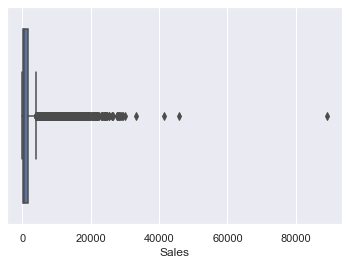

In [56]:
sns.boxplot(x=df['Sales'])

<AxesSubplot:xlabel='Shipping Cost'>

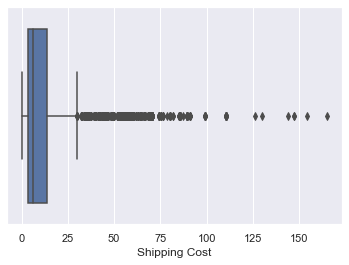

In [13]:
sns.boxplot(x=df['Shipping Cost'])

<AxesSubplot:xlabel='Unit Price'>

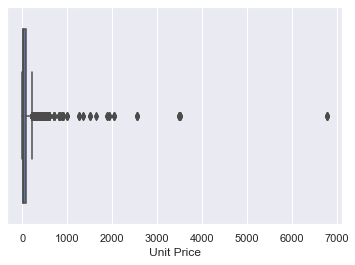

In [58]:
sns.boxplot(x=df['Unit Price'])

<AxesSubplot:xlabel='Profit'>

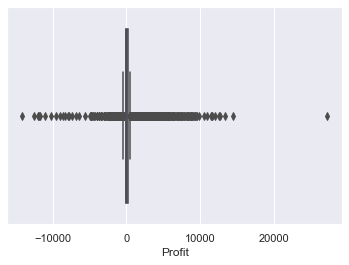

In [223]:
sns.boxplot(x=df['Profit'])

### Removing outliers

We will use the Z-score technique to remove the outliersin this dataset using the 'Sales' column. That can be achieved using 2 methods, first is the manual which we will calculate our Z-score by finding the mean and standard deviation of a particular column in this case "Sales". 
The second method is more faster because we will use Z-score function defined in scipy library to detect the outliers.

In [14]:
# Mean
Mean = df['Sales'].mean()

# Standard deviation
Std = df['Sales'].std()

print('Mean:', Mean)
print('Std:', Std)

Mean: 1775.8781788308177
Std: 3585.050524902428


In [15]:
# Find the lower and upper bound
lower_bound = Mean - 3 * Std
upper_bound = Mean + 3 * Std

print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)

lower_bound: -8979.273395876467
upper_bound: 12531.029753538101


In [16]:
# Define the formula
df1 = df[~((df['Sales'].lt (lower_bound)) | (df['Sales'].gt (upper_bound)))]

print('Before:', df.shape) # Shape before removing outliers
print('After: ',df1.shape) # Shape after removing outliers

Before: (8399, 14)
After:  (8191, 14)


In [17]:
# method 2 using Z score
from scipy import stats

z = np.abs(stats.zscore(df['Sales']))
print(z)


0       0.422429
1       2.328458
2       0.427163
3       0.889826
4       0.385403
          ...   
8394    0.134410
8395    0.385878
8396    0.265590
8397    0.364324
8398    0.069775
Name: Sales, Length: 8399, dtype: float64


In [18]:
df2 = df[(z < 3)]

df2.shape

(8191, 14)

### Plot unique values in the dataset

In [19]:
# unique values in the Region column
df1['Region'].value_counts()

West                     1934
Ontario                  1783
Prarie                   1673
Atlantic                 1057
Quebec                    756
Yukon                     530
Northwest Territories     380
Nunavut                    78
Name: Region, dtype: int64

### Plot the unique values

Text(0.5, 0, 'Orders')

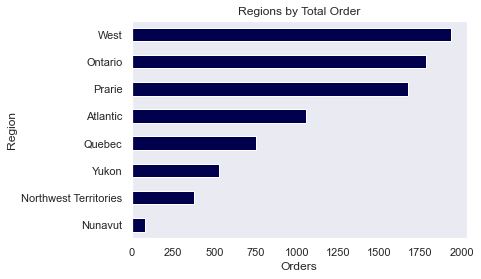

In [377]:
df1['Region'].value_counts().nsmallest(12).plot(kind = 'barh',cmap = 'seismic', grid = False)
plt.title('Regions by Total Order')
plt.ylabel('Region')
plt.xlabel('Orders')

Text(0.5, 0, 'Orders')

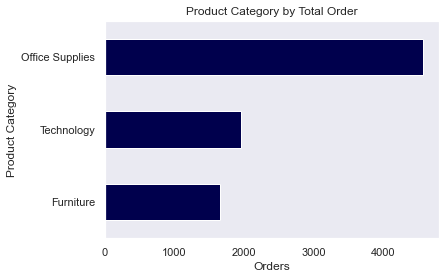

In [20]:
df1['Product Category'].value_counts().nsmallest().plot(kind = 'barh',cmap = 'seismic', grid = False)
plt.title('Product Category by Total Order')
plt.ylabel('Product Category')
plt.xlabel('Orders')

Text(0.5, 0, 'Orders')

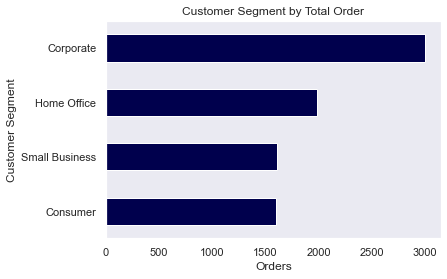

In [21]:
df1['Customer Segment'].value_counts().nsmallest().plot(kind = 'barh',cmap = 'seismic', grid = False)
plt.title('Customer Segment by Total Order')
plt.ylabel('Customer Segment')
plt.xlabel('Orders')

### Correlation plot - Heat map

This will alow us to see how variables depend on each other.

,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost
Order Quantity,1.000000,0.265710,-0.007963,0.207001,-0.140084,-0.044925
Sales,0.265710,1.000000,-0.000333,0.425154,0.494726,0.510406
Discount,-0.007963,-0.000333,1.000000,-0.041204,0.012310,0.010395
Profit,0.207001,0.425154,-0.041204,1.000000,-0.226512,-0.175524
Unit Price,-0.140084,0.494726,0.012310,-0.226512,1.000000,0.319122
Shipping Cost,-0.044925,0.510406,0.010395,-0.175524,0.319122,1.000000


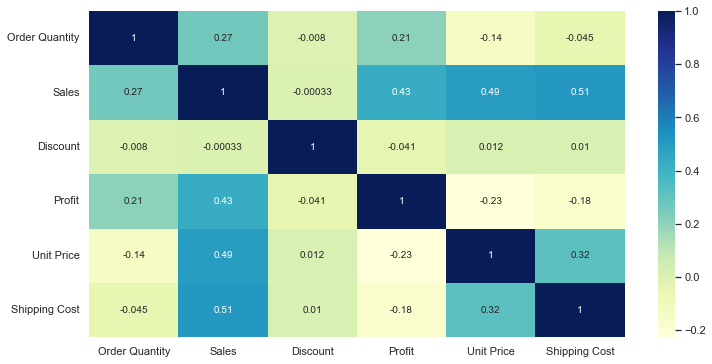

In [22]:
plt.figure(figsize=(12,6))
c= df1.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)
c

### Scatter plot

To show the relationship between two variables. In the case, the correlation between Profit and Order Quantity.

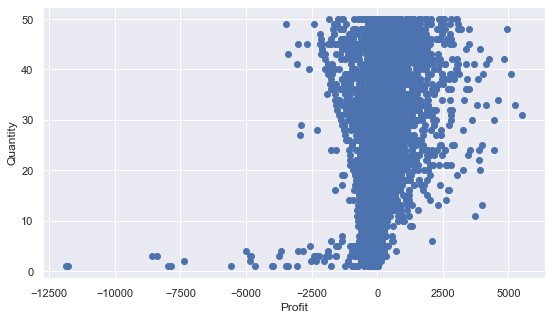

In [33]:
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(df1['Profit'], df1['Order Quantity'])
ax.set_xlabel('Profit')
ax.set_ylabel('Quantity')
plt.show()

#### We have been able to explore some of the functions in python used for data exploration and visualization.

### Thank you.